In [2]:
%load_ext autoreload
from sc.feature_extractor import FeatureExtractor
from sc.deep_feature_extractor import DeepFeatureExtractor
from sc.classifier import Classifier
from sc.signal_manager import SignalMgr
from sc.filter import Filter
from sc.data_reader import DataReader
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
# import xgboost as xgb

%matplotlib inline

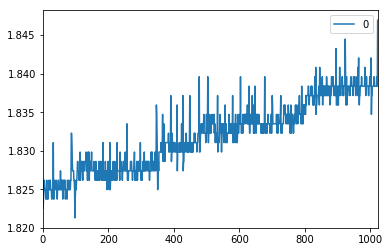

In [25]:
# Assumption1:
# 取出所有信号波谷的斜率，这个的角度比值应该显著小于1，而一等波应该几乎等于1
# path = '/Volumes/workspace/projects/signal_classification/data/特殊次品样本/20200428高低脚102/2.上高低脚-25个/20200416_095952522/Channel_6.csv'
path = '/Users/changkong/Desktop/2.2.4软件误判数据/6.XJ.NG-0416/20200416_132055811/Channel_6.csv'
signals = pd.read_csv(path, skiprows=1, header=None)
signals.plot()

/Users/changkong/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/changkong/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


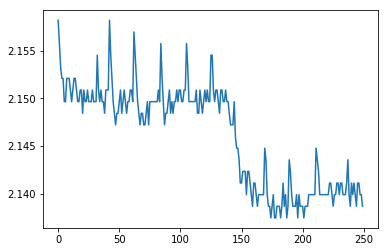

In [10]:
signal_mgr = SignalMgr()
dt, raw_signals = signal_mgr.parse_signals_from_file(path, 1)
print(plt.plot(raw_signals[0:250]))
features = signal_mgr.get_features(path, request_param={'skip_row': [1], 'model_path': ['train']})

In [11]:
print (features)

{'normalized_signals': array([2.2262232, 1.8477948, 1.4693664, ..., 0.3340813, 0.3340813,
       0.3340813], dtype=float32), 'peaks': array([  0,  32,  42,  62,  84, 105, 125, 169, 189, 211, 237, 253, 297,
       317, 339, 351, 359, 380, 423, 466, 488, 507, 551, 580, 719, 772]), 'down_peaks': array([], dtype=int64), 'negative_peak_num': 0, 'max_down_peak_point': 2.130127, 'up_edges': [(457, 461), (568, 574)], 'down_edges': [(139, 149), (257, 263), (769, 775)], 'peaks_num': 26, 'down_peaks_num': 0, 'up_edges_num': 2, 'down_edges_num': 3, 'peak_edge_ratio': 10.4, 'down_peak_edge_ratio': 0.0, 'up_edge_height': [0.56764257, 0.18921418], 'down_edge_height': [1.3244994, 0.75685674, 0.3784284], 'paired_edges': [((457, 461), (769, 775))], 'paired_edge_height': [(0.5676425695419312, 0.5676425695419312)], 'paired_edge_height_diff': [0.0], 'cyclic_nopeak_seq': [], 'cyclic_downpeak_seq': [], 'cyclic_intense_nopeak': 0, 'cyclic_intense_downpeak': 0, 'unit_interviene_length': [], 'unit_interviene_le